In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='white', color_codes=True, font_scale=1.25)

import os
directory = os.getcwd()

In [53]:
pd.options.display.max_rows = 300
pd.options.display.max_columns = 300

In [3]:
actors = pd.read_excel(directory + '/final_movies.xlsx')

In [133]:
movies = actors.copy()

In [134]:
movies.columns

Index(['Unnamed: 0', 'Movie', 'Year', 'Rating', 'Duration (min)', 'Genres',
       'Stars', 'Metascore', 'Votes', 'Gross ($M)', 'Director', 'Lead',
       'Gender', 'DOB', 'Role Type', 'Age', 'Genre 1', 'Genre 2', 'Genre 3'],
      dtype='object')

In [135]:
movies = movies.drop(['Unnamed: 0'],1)

In [136]:
movies.head()

,Movie,Year,Rating,Duration (min),Genres,Stars,Metascore,Votes,Gross ($M),Director,Lead,Gender,DOB,Role Type,Age,Genre 1,Genre 2,Genre 3
0,The Godfather,1972,R,175,"Crime, Drama",9.2,100.0,"1,487,008",134.97,Francis Ford Coppola,Marlon Brando,M,1924.0,modern male,48.0,Crime,Drama,NaN
1,On the Waterfront,1954,Not Rated,108,"Crime, Drama, Thriller",8.1,97.0,"132,088",4.36,Elia Kazan,Marlon Brando,M,1924.0,modern male,30.0,Crime,Drama,Thriller
2,The Godfather: Part II,1974,R,202,"Crime, Drama",9.0,90.0,"1,035,651",57.30,Francis Ford Coppola,Al Pacino,M,1939.0,malevolent lead,35.0,Crime,Drama,NaN
3,Scarface,1983,R,170,"Crime, Drama",8.3,58.0,"684,587",309.13,Brian De Palma,Al Pacino,M,1939.0,malevolent lead,44.0,Crime,Drama,NaN
4,Heat,1995,R,170,"Crime, Drama, Thriller",8.2,96.0,"537,420",1.11,Michael Mann,Al Pacino,M,1939.0,malevolent lead,56.0,Crime,Drama,Thriller


# Cleanup

In [137]:
movies["Year"] = movies["Year"].astype(int)

In [138]:
movies.iloc[60]

Movie                       Reservoir Dogs
Year                                  1992
Rating                              99 min
Duration (min)    \nCrime, Drama, Thriller
Genres                                 NaN
Stars                                  8.3
Metascore                              NaN
Votes                              856,282
Gross ($M)                             NaN
Director                 Quentin Tarantino
Lead                         Harvey Keitel
Gender                                   M
DOB                                   1947
Role Type                              RU:
Age                                     45
Genre 1                                NaN
Genre 2                                NaN
Genre 3                                NaN
Name: 60, dtype: object

In [139]:
movies.loc[60, 'Rating'] = 'R'
movies.loc[60, 'Duration (min)'] = 99
movies.loc[60, 'Genres'] = 'Crime, Drama, Thriller'
movies.loc[60, 'Genre 1'] = 'Crime'
movies.loc[60, 'Genre 2'] = 'Drama'
movies.loc[60, 'Genre 3'] = 'Thriller'

In [140]:
movies.iloc[60]

Movie                     Reservoir Dogs
Year                                1992
Rating                                 R
Duration (min)                        99
Genres            Crime, Drama, Thriller
Stars                                8.3
Metascore                            NaN
Votes                            856,282
Gross ($M)                           NaN
Director               Quentin Tarantino
Lead                       Harvey Keitel
Gender                                 M
DOB                                 1947
Role Type                            RU:
Age                                   45
Genre 1                            Crime
Genre 2                            Drama
Genre 3                         Thriller
Name: 60, dtype: object

In [141]:
movies["Duration (min)"] = movies["Duration (min)"].astype(int)

In [142]:
movies["Stars"] = movies["Stars"].astype(float)

In [143]:
movies['Metascore'][movies["Metascore"].isna()] = 0

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [144]:
movies["Metascore"] = movies["Metascore"].astype(float)

In [145]:
n_votes = []
for i in movies['Votes']:
    n_votes.append(i.replace(',', ''))

In [146]:
movies['Votes'] = n_votes 

In [147]:
movies["Votes"] = movies["Votes"].astype(int)

In [148]:
movies['Gross ($M)'][movies["Gross ($M)"].isna()] = 0
movies["Gross ($M)"] = movies["Gross ($M)"].astype(float)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [149]:
movies[movies["DOB"].isna() ]

,Movie,Year,Rating,Duration (min),Genres,Stars,Metascore,Votes,Gross ($M),Director,Lead,Gender,DOB,Role Type,Age,Genre 1,Genre 2,Genre 3
79,Monty Python and the Holy Grail,1975,PG,91,"Adventure, Comedy, Fantasy",8.2,92.0,473262,1.23,Terry Gilliam,Graham Chapman,M,NaN,character,NaN,Adventure,Comedy,Fantasy
80,Monty Python's Life of Brian,1979,R,94,Comedy,8.1,70.0,343571,48.98,Terry Jones,Graham Chapman,M,NaN,character,NaN,Comedy,NaN,NaN
94,Fargo,1996,R,98,"Crime, Drama, Thriller",8.1,85.0,575841,24.61,Joel Coen,William H. Macy,M,NaN,character,NaN,Crime,Drama,Thriller


In [150]:
movies.loc[79, 'DOB'] = 1941
movies.loc[80, 'DOB'] = 1941
movies.loc[94, 'DOB'] = 1950

movies.loc[79, 'Age'] = 34
movies.loc[80, 'Age'] = 38
movies.loc[94, 'Age'] = 46


In [151]:
movies["DOB"] = movies["DOB"].astype(int)

In [155]:
movies['Age'] = movies['Age'].astype(int)

In [156]:
movies.head()

,Movie,Year,Rating,Duration (min),Genres,Stars,Metascore,Votes,Gross ($M),Director,Lead,Gender,DOB,Role Type,Age,Genre 1,Genre 2,Genre 3
0,The Godfather,1972,R,175,"Crime, Drama",9.2,100.0,1487008,134.97,Francis Ford Coppola,Marlon Brando,M,1924,modern male,48,Crime,Drama,NaN
1,On the Waterfront,1954,Not Rated,108,"Crime, Drama, Thriller",8.1,97.0,132088,4.36,Elia Kazan,Marlon Brando,M,1924,modern male,30,Crime,Drama,Thriller
2,The Godfather: Part II,1974,R,202,"Crime, Drama",9.0,90.0,1035651,57.30,Francis Ford Coppola,Al Pacino,M,1939,malevolent lead,35,Crime,Drama,NaN
3,Scarface,1983,R,170,"Crime, Drama",8.3,58.0,684587,309.13,Brian De Palma,Al Pacino,M,1939,malevolent lead,44,Crime,Drama,NaN
4,Heat,1995,R,170,"Crime, Drama, Thriller",8.2,96.0,537420,1.11,Michael Mann,Al Pacino,M,1939,malevolent lead,56,Crime,Drama,Thriller


# Visualizations

Text(0.5,1,'Movie Count by Year')

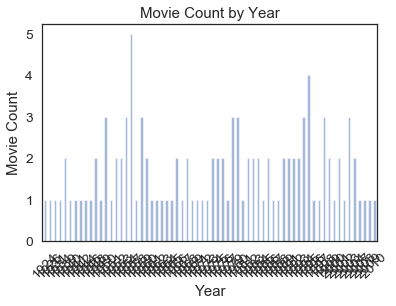

In [157]:
#Determine the amount of movies that were produced each year
movie_yearly_count = movies['Year'].value_counts().sort_index().plot(kind='bar', color='b', alpha=0.5, grid=False, rot=45)
movie_yearly_count.set_xlabel('Year')
movie_yearly_count.set_ylabel('Movie Count')
movie_yearly_count.set_title('Movie Count by Year')

In [159]:
movie_yearly_count = movies['Year'].value_counts().sort_index()
movie_yearly_count = movie_yearly_count.groupby((movie_yearly_count.index//10)*10).sum()

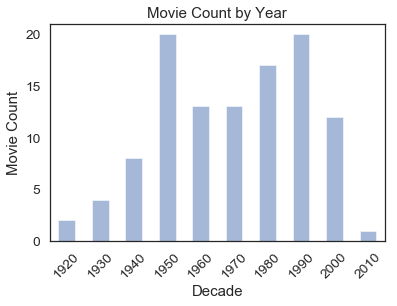

In [266]:
#Determine the amount of movies that were produced each year
new = movie_yearly_count.plot(kind='bar', color='b', alpha=0.5, grid=False, rot=45)
new.set_xlabel('Decade')
new.set_ylabel('Movie Count')
new.set_title('Movie Count by Year');

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


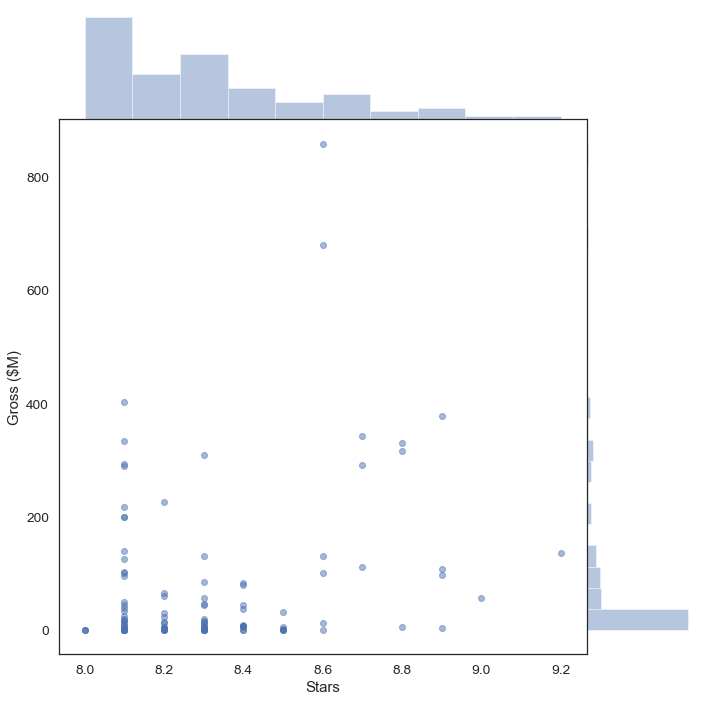

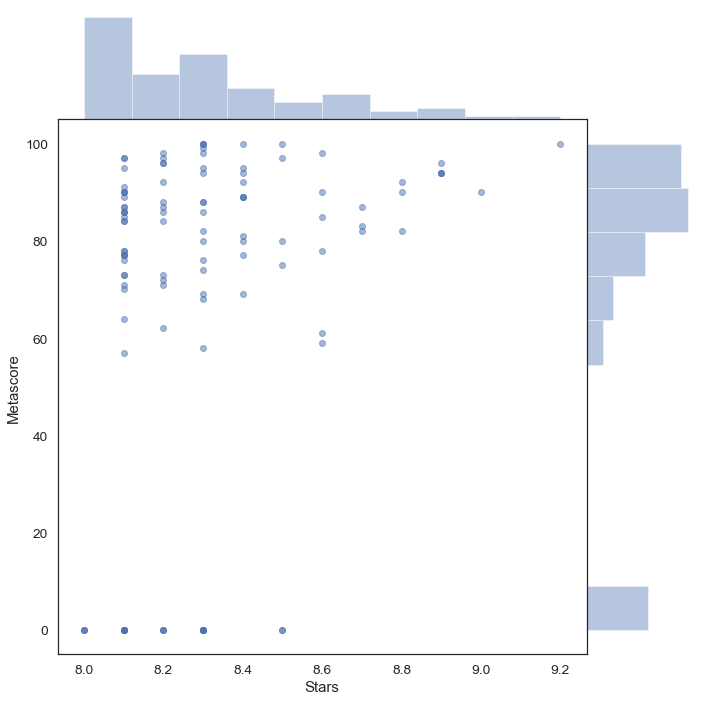

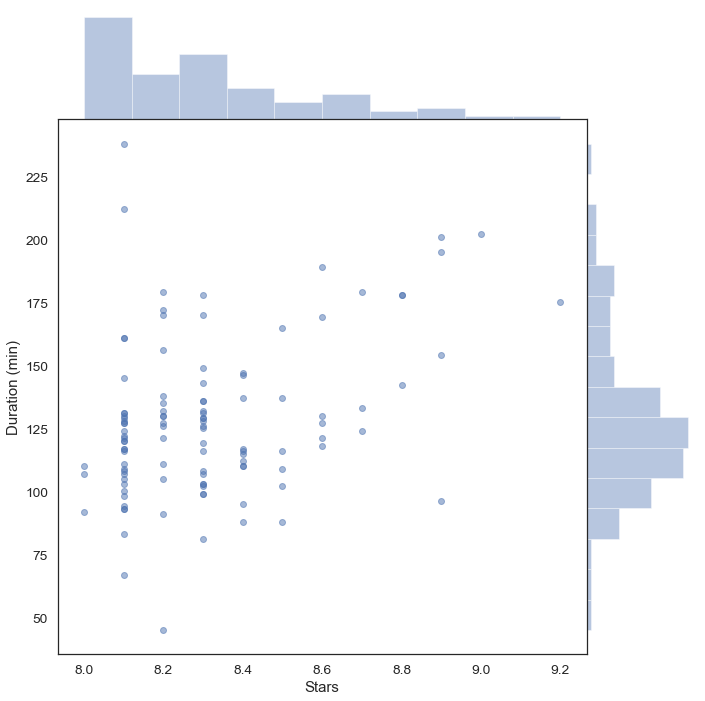

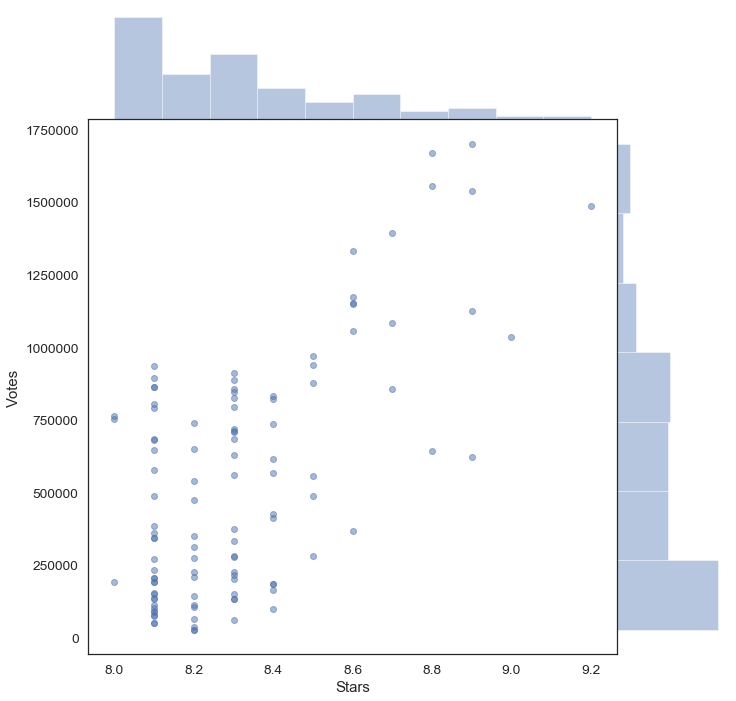

In [165]:
ratings_comparisons = ['Gross ($M)', 'Metascore', 'Duration (min)', 'Votes']

for comparison in ratings_comparisons:
    sns.jointplot(x='Stars', y=comparison, data=movies, alpha=0.5, color='b', size=10, space=0)

In [171]:
genre_pcts = movies['Genre 1'].value_counts().sort_index()

In [184]:
genre_i = list(genre_pcts.index)
genre_p = list(genre_pcts.values / movies.shape[0])

In [192]:
frames = [genre_i, genre_p]
genre_pcts_df = pd.DataFrame(frames)
genre_pcts_df = genre_pcts_df.T
genre_pcts_df = genre_pcts_df.rename(columns={0:'Genres', 1:'Percent'})

In [203]:
genre_pcts_df = genre_pcts_df.set_index('Genres')

In [204]:
genre_pcts_df

,Percent
Genres,
Action,0.127273
Adventure,0.127273
Animation,0.045455
Biography,0.045455
Comedy,0.100000
Crime,0.172727
Drama,0.300000
Film-Noir,0.009091
Horror,0.027273


In [205]:
genre_pcts_df['Percent'] = genre_pcts_df['Percent'].astype(float)

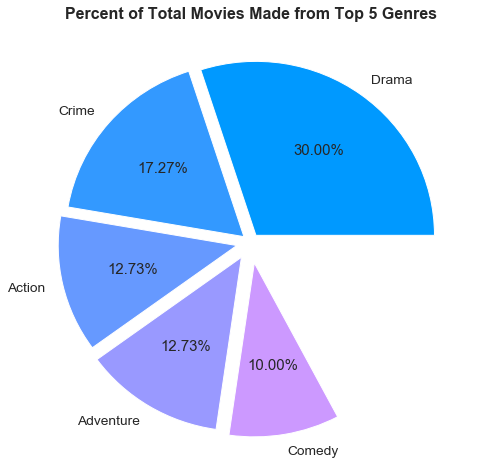

In [209]:
explode = (0.05, 0.05, 0.08, 0.1, 0.12)
colors = ['#0099FF', '#3399FF', '#6699FF', '#9999FF', '#CC99FF', ]
genre_pcts_df.sort_values(by='Percent', ascending=False).head(5).plot.pie(legend=False, subplots=True, autopct='%.2f%%', figsize=(8,8), colors=colors, explode=explode)
plt.ylabel('')
plt.title('Percent of Total Movies Made from Top 5 Genres', weight='bold', fontsize=16);

In [212]:
rev_pcts = movies[['Genre 1', 'Gross ($M)']]

In [216]:
rev_pcts = rev_pcts.groupby(['Genre 1']).sum()

In [220]:
total_gross = sum(list(rev_pcts['Gross ($M)']))

In [221]:
total_gross

8263.660000000002

In [224]:
rev_pcts['Gross ($M)'] = rev_pcts['Gross ($M)']/total_gross

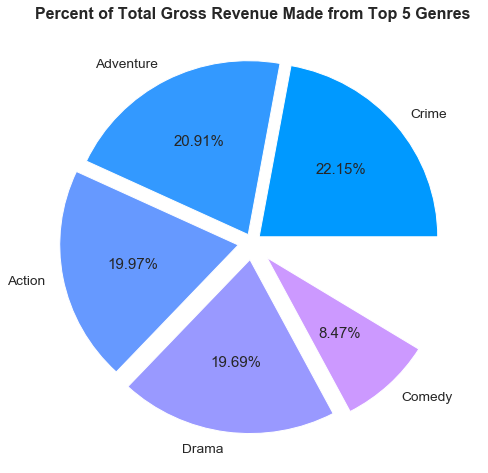

In [226]:
explode = (0.05, 0.05, 0.08, 0.1, 0.12)
colors = ['#0099FF', '#3399FF', '#6699FF', '#9999FF', '#CC99FF', ]
rev_pcts.sort_values(by='Gross ($M)', ascending=False).head(5).plot.pie(legend=False, subplots=True, autopct='%.2f%%', figsize=(8,8), colors=colors, explode=explode)
plt.ylabel('')
plt.title('Percent of Total Gross Revenue Made from Top 5 Genres', weight='bold', fontsize=16);

In [227]:
director_pcts = movies[['Director', 'Gross ($M)', ]]

In [229]:
director_pcts = director_pcts.groupby(['Director']).sum()

In [231]:
total_gross = sum(list(director_pcts['Gross ($M)']))

In [232]:
total_gross

8263.66

In [233]:
director_pcts['Gross ($M)'] = director_pcts['Gross ($M)']/total_gross

In [243]:
director_pcts.sort_values(by='Gross ($M)', ascending=False).head(10)

,Gross ($M)
Director,
Peter Jackson,0.125361
Jonathan Demme,0.103873
George Lucas,0.082145
Steven Spielberg,0.080700
David Lean,0.048085
Frank Capra,0.041326
Carol Reed,0.040319
Robert Zemeckis,0.039964
Brian De Palma,0.037408


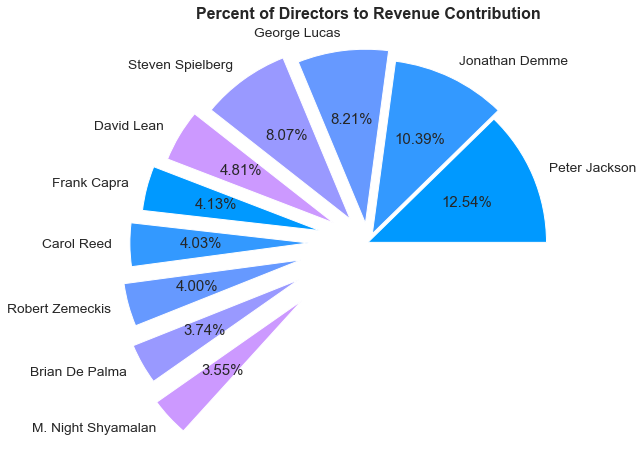

In [252]:
explode = np.linspace(0, 0.5, 10)
colors = ['#0099FF', '#3399FF', '#6699FF', '#9999FF', '#CC99FF', ]
director_pcts.sort_values(by='Gross ($M)', ascending=False).head(10).plot.pie(legend=False, subplots=True, autopct='%.2f%%', figsize=(8,8), colors=colors, explode = explode)
plt.ylabel('')
plt.title('Percent of Directors to Revenue Contribution', weight='bold', fontsize=16);

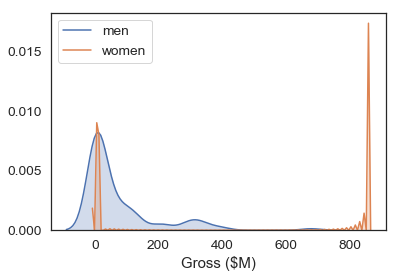

In [255]:
sns.kdeplot(movies['Gross ($M)'][movies.Gender=='M'], label='men', shade=True)
sns.kdeplot(movies['Gross ($M)'][movies.Gender=='F'], label='women', shade=True)
plt.xlabel('Gross ($M)');

Female leads bring in more money, but there are much less female leads than male leads as shown by width of distributions.

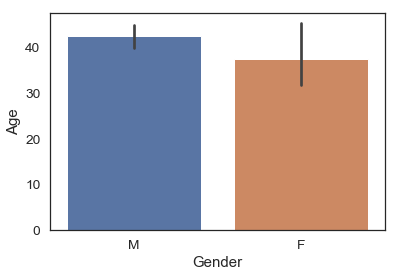

In [256]:
sns.barplot(x='Gender', y='Age', data=movies)

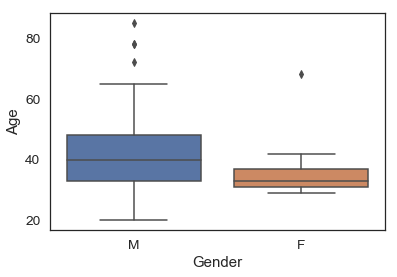

In [258]:
sns.boxplot(x='Gender', y='Age', data=movies)

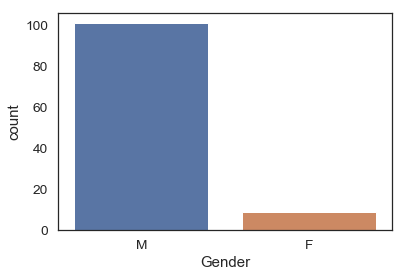

In [257]:
sns.countplot(x='Gender', data=movies)

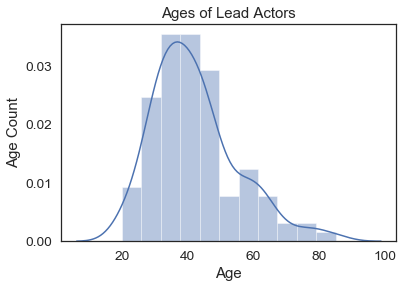

In [261]:
new = sns.distplot(movies.Age)
new.set_xlabel('Age')
new.set_ylabel('Age Count')
new.set_title('Ages of Lead Actors');

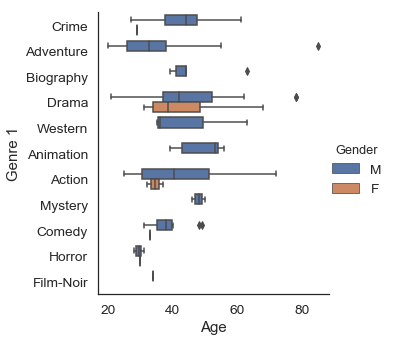

In [268]:
new = sns.catplot(x="Age",y="Genre 1",kind='box',hue='Gender',data=movies);

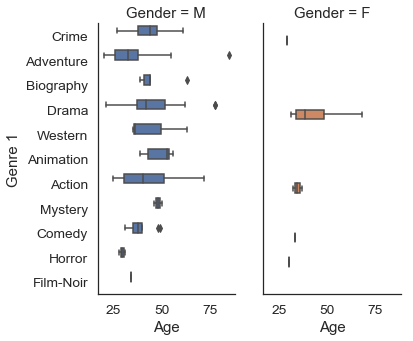

In [269]:
sns.catplot(x="Age",y="Genre 1", hue="Gender",
            col="Gender", aspect=.6,
            kind="box", data=movies);